<a href="https://colab.research.google.com/github/anash18/4105-HW-Nash/blob/main/ECGR_4105_HW_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
#Problem 1

#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalerminmax = MinMaxScaler()
scalerstand = StandardScaler()

#Importing File from MyDrive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4105 Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
#housing.head()
housing.shape
#housing.isnull().sum()*100/housing.shape[0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(545, 13)

In [263]:
#mapping the variables to a binary output
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [264]:
#Splitting into training and validation
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [265]:
#Splitting Variables
train_y_value = df_train["price"]
val_y_value = df_test["price"]


#Setting up variables
m_train = len(train_y_value) #Number of Samples in set
m_val = len(val_y_value) #Number of Samples in set
learning_rate = 0.000000001
iterations = 100
theta_a = np.zeros(6)
theta_b = np.zeros(12)

#Part A
var_a = ['area' , 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a_train = np.c_[np.ones((m_train, 1)), df_train[var_a]]
X_a_val = np.c_[np.ones((m_val, 1)), df_test[var_a]]

#Part B
var_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_b_train = np.c_[np.ones((m_train, 1)), df_train[var_b]]
X_b_val = np.c_[np.ones((m_val, 1)), df_test[var_b]]

train_losses_a = []
val_losses_a = []
train_losses_b = []
val_losses_b = []
#df_train.head()

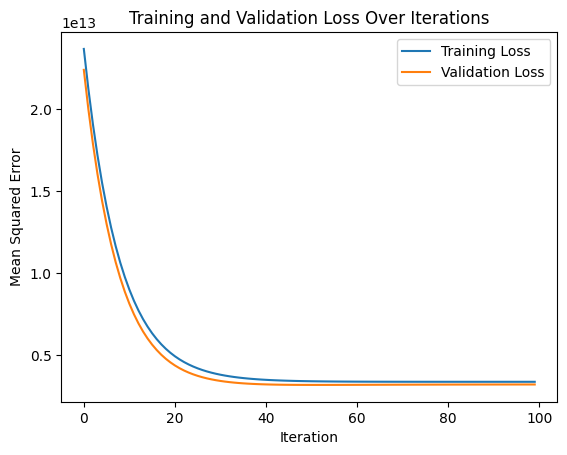

In [266]:
#Loss of Part A

for iteration in range(iterations):
    gradients = 2/m_train * X_a_train.T.dot(X_a_train.dot(theta_a) - train_y_value)
    theta_a -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_a_train.dot(theta_a) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_a_val.dot(theta_a) - val_y_value))

    train_losses_a.append(train_loss)
    val_losses_a.append(val_loss)

plt.plot(train_losses_a, label="Training Loss")
plt.plot(val_losses_a, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

#df_train.head()

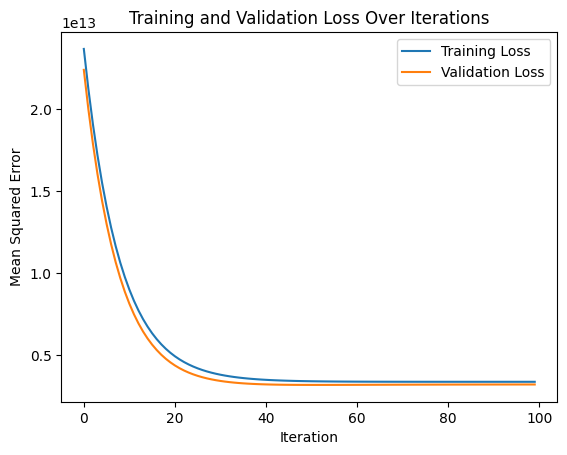

In [267]:
#Loss for Part B

for iteration in range(iterations):
    gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta_b) - train_y_value)
    theta_b -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta_b) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta_b) - val_y_value))

    train_losses_b.append(train_loss)
    val_losses_b.append(val_loss)

plt.plot(train_losses_b, label="Training Loss")
plt.plot(val_losses_b, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

#df_train.head()

In [268]:
#Problem 2a) standardizing the training set

#standardization
df_train_stan = df_train
df_train_stan[var_a] = scalerstand.fit_transform(df_train_stan[var_a])
df_train_stan.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,7840000,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [269]:
#Problem 2a) standardizing the validation set

#standardization
df_val_stan = df_test
df_val_stan[var_a] = scalerstand.fit_transform(df_val_stan[var_a])
df_val_stan.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1,0,0,0,0,-0.643743,1,semi-furnished
54,7350000,0.369177,-0.072023,1.466964,0.308415,1,1,0,0,1,0.545545,0,semi-furnished
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1,0,0,0,0,0.545545,1,semi-furnished
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1,1,1,0,0,-0.643743,1,semi-furnished
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1,0,0,0,1,-0.643743,0,semi-furnished


In [270]:
#Problem 2b) standardizing the training set

#standardization
df_train_stan_b = df_train
df_train_stan_b[var_b] = scalerstand.fit_transform(df_train_stan_b[var_b])
df_train_stan_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083,furnished
41,7840000,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217,furnished
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217,furnished
118,5950000,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217,furnished
472,3010000,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083,semi-furnished


In [271]:
#Problem 2b) standardizing the validation set

#standardization
df_val_stan_b = df_test
df_val_stan_b[var_b] = scalerstand.fit_transform(df_val_stan_b[var_b])
df_val_stan_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710,semi-furnished
54,7350000,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819,semi-furnished
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710,semi-furnished
244,4550000,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710,semi-furnished
268,4382000,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819,semi-furnished


In [272]:
#Stacking them inputs for standardization

learning_rate = 0.002
iterations = 1000
theta_a = np.zeros(6)
theta_b = np.zeros(12)

#Part A
var_a = ['area' , 'bedrooms', 'bathrooms', 'stories', 'parking']
X_a_train_stan = np.c_[np.ones((m_train, 1)), df_train_stan[var_a]]
X_a_val_stan = np.c_[np.ones((m_val, 1)), df_val_stan[var_a]]

print("The value for X_a_train_stan =",X_a_train_stan)
#print(X_a_val_stan)

The value for X_a_train_stan = [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 ...
 [ 1.         -0.80298534 -1.29348292 -0.57989658  0.20558213  0.31148433]
 [ 1.          0.39777791  0.07867901  1.41092949  1.34018732 -0.8492607 ]
 [ 1.          1.18897851 -1.29348292 -0.57989658 -0.92902305 -0.8492607 ]]


In [273]:
#Part B
var_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_b_train_stan = np.c_[np.ones((m_train, 1)), df_train_stan_b[var_b]]
X_b_val_stan = np.c_[np.ones((m_val, 1)), df_val_stan_b[var_b]]

train_losses_a_stan = []
val_losses_a_stan = []
train_losses_b_stan = []
val_losses_b_stan = []

print("The value for X_b_train_stan =",X_b_train_stan)

The value for X_b_train_stan = [[ 1.          1.35187274  0.07867901 ...  1.52585854  0.31148433
  -0.54908336]
 [ 1.          0.56532627  0.07867901 ...  1.52585854 -0.8492607
   1.82121709]
 [ 1.          0.746837   -1.29348292 ... -0.65536875  1.47222936
   1.82121709]
 ...
 [ 1.         -0.80298534 -1.29348292 ... -0.65536875  0.31148433
  -0.54908336]
 [ 1.          0.39777791  0.07867901 ...  1.52585854 -0.8492607
  -0.54908336]
 [ 1.          1.18897851 -1.29348292 ... -0.65536875 -0.8492607
  -0.54908336]]


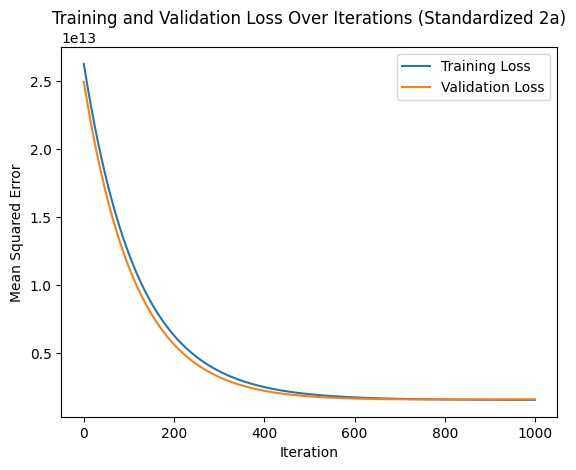

In [274]:
#Loss of Part A using standardization

for iteration in range(iterations):
    gradients = 2/m_train * X_a_train_stan.T.dot(X_a_train_stan.dot(theta_a) - train_y_value)
    theta_a -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_a_train_stan.dot(theta_a) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_a_val_stan.dot(theta_a) - val_y_value))

    train_losses_a_stan.append(train_loss)
    val_losses_a_stan.append(val_loss)

plt.plot(train_losses_a_stan, label="Training Loss")
plt.plot(val_losses_a_stan, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Standardized 2a)")
plt.show()

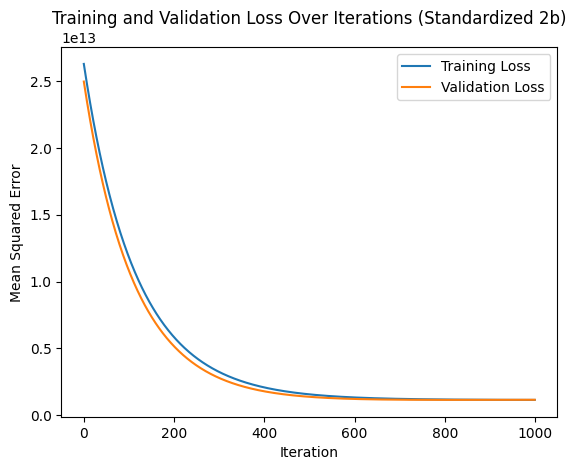

In [275]:
#Loss of Part B using standardization
for iteration in range(iterations):
    gradients = 2/m_train * X_b_train_stan.T.dot(X_b_train_stan.dot(theta_b) - train_y_value)
    theta_b -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train_stan.dot(theta_b) - train_y_value))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val_stan.dot(theta_b) - val_y_value))

    train_losses_b_stan.append(train_loss)
    val_losses_b_stan.append(val_loss)

plt.plot(train_losses_b_stan, label="Training Loss")
plt.plot(val_losses_b_stan, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Standardized 2b)")
plt.show()

In [276]:
#Problem 3

def gradient_descent_pen(train,val,y_train,y_test,learning_rate,theta,iterations,penalty_par,input):
  train_losses = []
  val_losses = []

  for iteration in range(iterations):
    penalty = np.square(np.sum(theta))
    gradients = 2/m_train * train.T.dot(train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
  return train_losses, val_losses

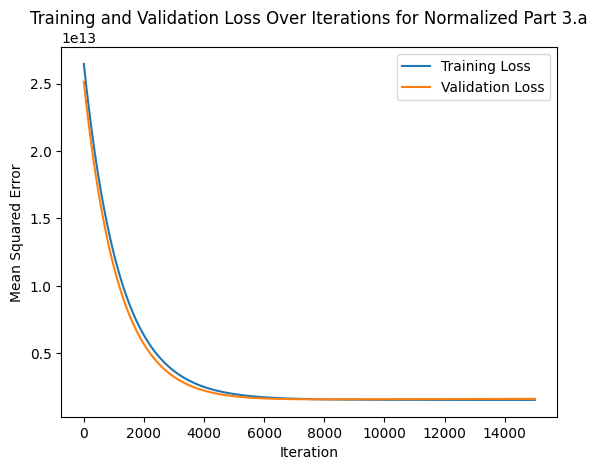

In [277]:
#Part 3a)
#standardization
df_train_minmax_pen = df_train_stan
df_train_minmax_pen[var_a] = scalerstand.fit_transform(df_train_minmax_pen[var_a])


var_a = ['area' , 'bedrooms', 'bathrooms', 'stories', 'parking']
train_minmax_pen = np.c_[np.ones((m_train, 1)), df_train_minmax_pen[var_a]]



df_val_minmax_pen = df_val_stan
df_val_minmax_pen[var_a] = scalerstand.fit_transform(df_val_minmax_pen[var_a])
val_minmax_pen = np.c_[np.ones((m_val, 1)), df_val_minmax_pen[var_a]]

theta_a = np.zeros(6)

iterations = 15000
learning_rate = 0.0002
inputs = 5
pen_par = 0.000000001

train_losses_3a_pen, val_losses_3a_pen = gradient_descent_pen(train_minmax_pen,val_minmax_pen,train_y_value,val_y_value,learning_rate, theta_a, iterations, pen_par,inputs)

plt.plot(train_losses_3a_pen, label="Training Loss")
plt.plot(val_losses_3a_pen, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()

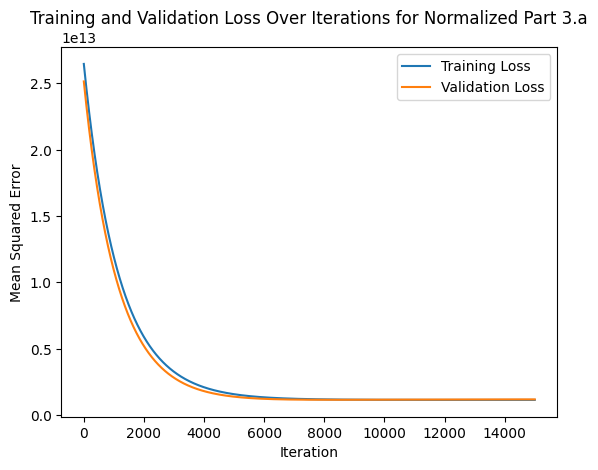

In [278]:
#Part 3b)
#standardization
#it says minmax but know that it's standardization copied from my other code (minmax) and didn't need to change also it's 12 am so please forgive me
df_train_minmax_pen = df_train_stan_b
df_train_minmax_pen[var_b] = scalerstand.fit_transform(df_train_minmax_pen[var_b])

train_minmax_pen = np.c_[np.ones((m_train, 1)), df_train_minmax_pen[var_b]]



df_val_minmax_pen = df_val_stan_b
df_val_minmax_pen[var_b] = scalerstand.fit_transform(df_val_minmax_pen[var_b])
val_minmax_pen = np.c_[np.ones((m_val, 1)), df_val_minmax_pen[var_b]]

theta_b = np.zeros(12)

iterations = 15000
learning_rate = 0.0002
inputs = 5
pen_par = 0.000000001

train_losses_3b_pen, val_losses_3b_pen = gradient_descent_pen(train_minmax_pen,val_minmax_pen,train_y_value,val_y_value,learning_rate, theta_b, iterations, pen_par,inputs)

plt.plot(train_losses_3b_pen, label="Training Loss")
plt.plot(val_losses_3b_pen, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()